## *Objective*

    1. Fit SARIMA models to the Milk production data
    2. Forecast the milk production

### *Parsimony principle of SARIMA model*

$SARIMA(p,d,q,P,D,Q)_s$

where, 

    p - order of non-seasonal AR process
    d - order of non-seasonal differencing (to make time-series stationary by removing trend)
    q - order of non-seasonal MA process
    P - order of seasonal AR process
    D - order of seasonal differencing (to make time-series stationary by removing trend)
    Q - order of seasonal MA process

** Parsimony principle is as follows **

$p+d+q+P+D+Q<=6$

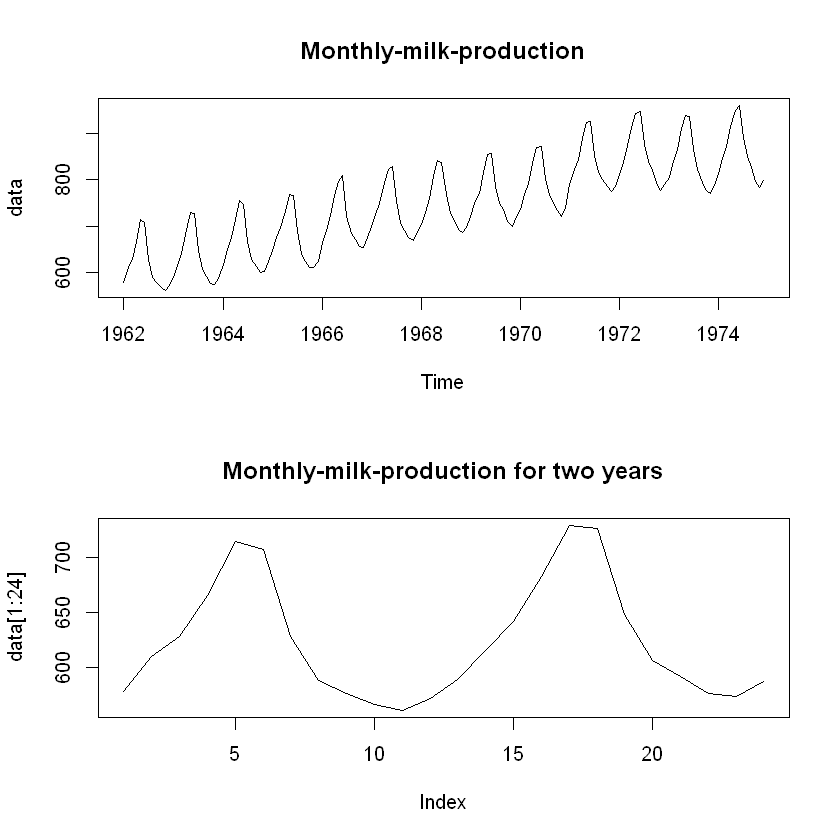

In [31]:
#Read milk-production data
milk <- read.csv("monthly-milk-production-pounds-p.csv",stringsAsFactors=F)
#reference : https://datamarket.com/data/set/22ox/monthly-milk-production-pounds-per-cow-jan-62-dec-75#!ds=22ox&display=line
data <- ts(milk$Monthly.milk.production..pounds.per.cow..Jan.62...Dec.75,frequency = 12,start = c(1962))
par(mfrow = c(2,1))
plot(data,main='Monthly-milk-production')
plot(data[1:24],type='l',main='Monthly-milk-production for two years')

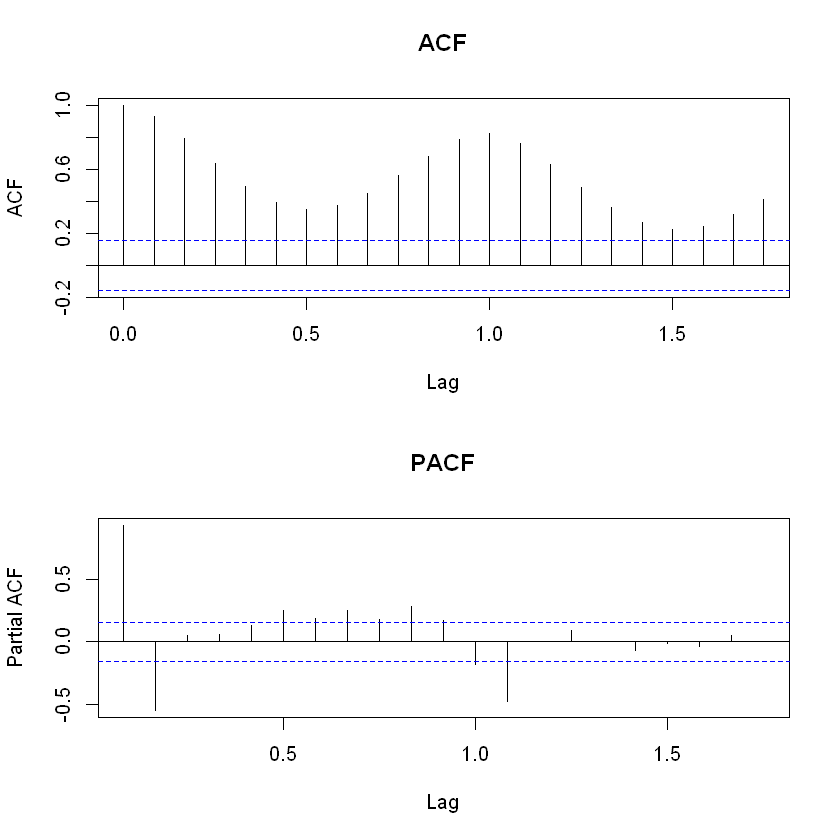

In [32]:
par(mfrow = c(2,1))
acf(data,main='ACF') #suggests a cyclic behaviour (tailing off)
pacf(data,main='PACF') #tailing off 

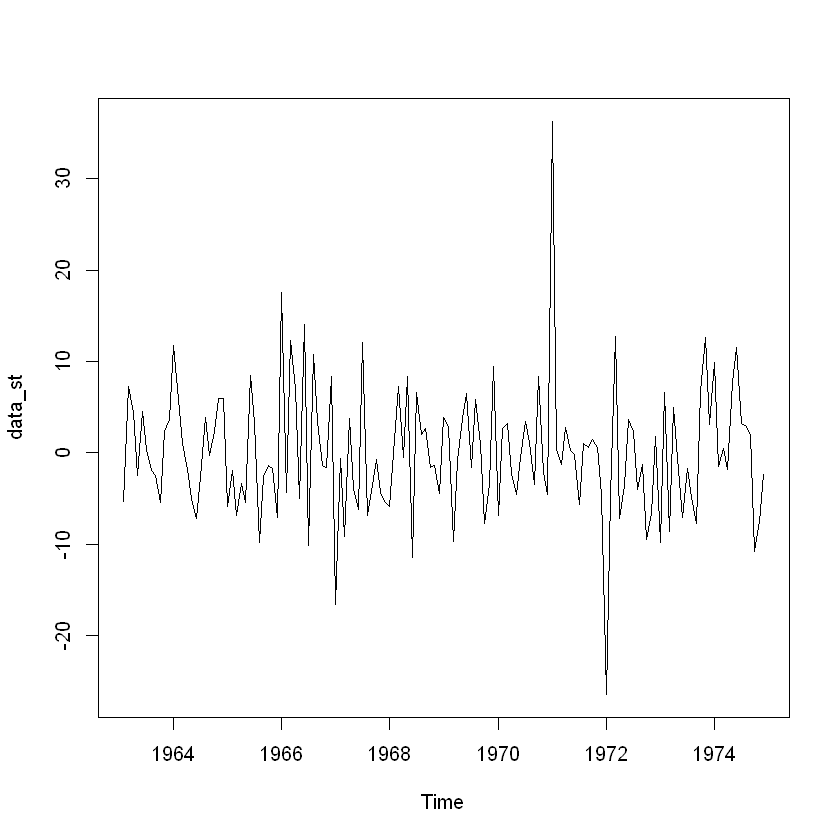

In [33]:
#There is definitely a trend and seasonality (from two years plot)
#Variation looks almost constant
#So we just need to remove the data and no need to transform the data
#Seasonal differencing (looks like there is a yearly seasonality) and non-seasonal differencing
data_st <- diff(diff(data),12)
plot(data_st) #now the plot looks almost stationary

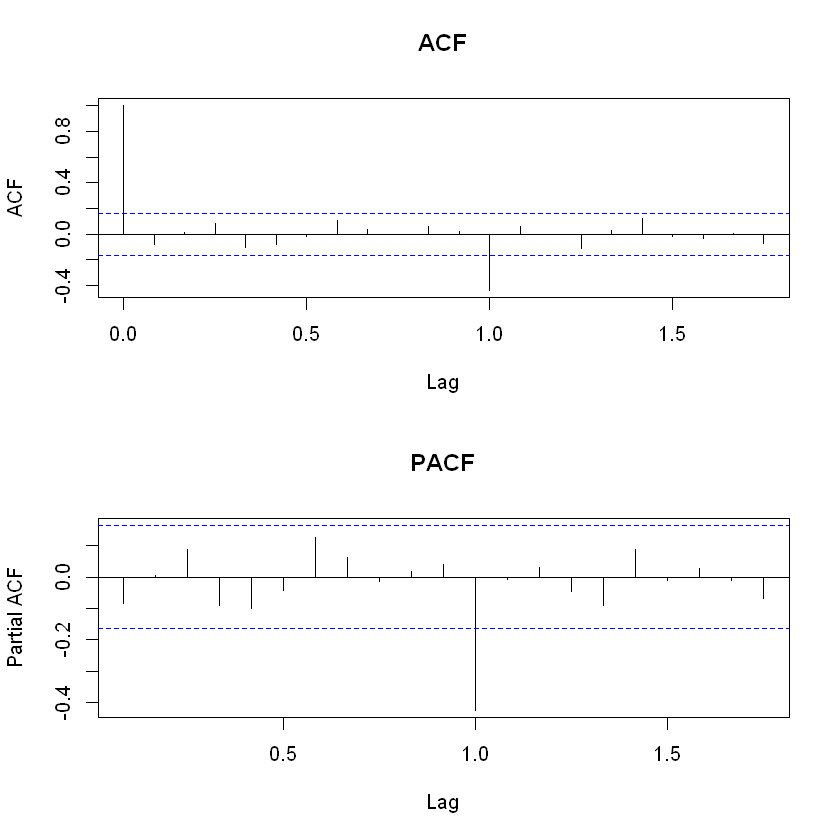

In [35]:
#let's look acf and pacf of differenced data
par(mfrow = c(2,1))
acf(data_st,main='ACF') #suggests seasonal auto-regressive process of lag-1 for the frequency 12
pacf(data_st,main='PACF') #suggests seasonal MA process of lag-1 for the frequency 12

In [36]:
#ACF suggests 'seasonal moving average term of order 1' (because there is a spike at lag1 for the frequency 12)
#PACF suggests 'seasonal AR term of order 1 for the frequency 12'
#let's look at the box test results
Box.test(data_st,type='Ljung-Box',lag=log(length(data_st)))


	Box-Ljung test

data:  data_st
X-squared = 3.7805, df = 4.9628, p-value = 0.5763


initial  value 1.980906 
iter   2 value 1.841820
iter   3 value 1.811513
iter   4 value 1.795767
iter   5 value 1.785667
iter   6 value 1.783695
iter   7 value 1.783357
iter   8 value 1.782680
iter   9 value 1.782603
iter  10 value 1.782602
iter  10 value 1.782602
iter  10 value 1.782602
final  value 1.782602 
converged
initial  value 1.796545 
iter   2 value 1.796377
iter   3 value 1.795431
iter   4 value 1.795424
iter   5 value 1.795419
iter   6 value 1.795419
iter   6 value 1.795419
final  value 1.795419 
converged


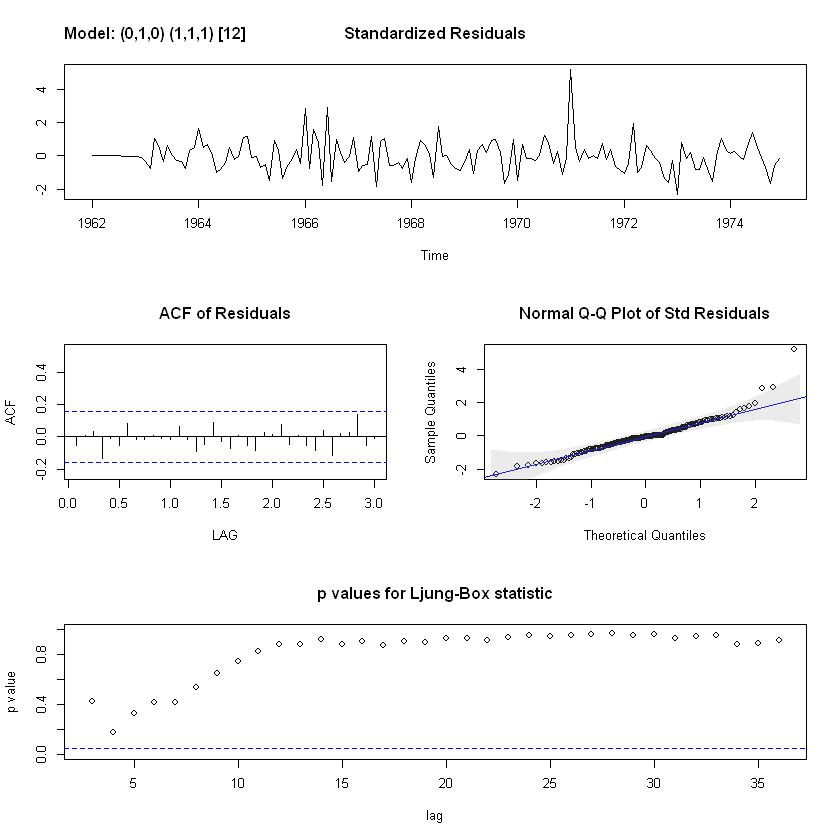

In [37]:
#Box test suggests there is an auto-correlation
#so let's model using SARIMA routine
library('astsa')
m <- sarima(data,p=0,d=1,q=0,P=1,D=1,Q=1,S = 12)

In [38]:
m$fit


Call:
stats::arima(x = xdata, order = c(p, d, q), seasonal = list(order = c(P, D, 
    Q), period = S), include.mean = !no.constant, optim.control = list(trace = trc, 
    REPORT = 1, reltol = tol))

Coefficients:
        sar1     sma1
      0.0188  -0.6862
s.e.  0.1244   0.1047

sigma^2 estimated as 34.45:  log likelihood = -459.65,  aic = 925.31

In [39]:
#using the same but using ARIMA routine
m2 <- arima(data,order = c(0,1,0),seasonal = list(order=c(0,1,1),period=12))
m2


Call:
arima(x = data, order = c(0, 1, 0), seasonal = list(order = c(0, 1, 1), period = 12))

Coefficients:
         sma1
      -0.6750
s.e.   0.0752

sigma^2 estimated as 34.47:  log likelihood = -459.66,  aic = 923.33

In [40]:
b <- Box.test(resid(m2),type='Ljung-Box',lag=log(length(data_st)))
b


	Box-Ljung test

data:  resid(m2)
X-squared = 3.4914, df = 4.9628, p-value = 0.6197


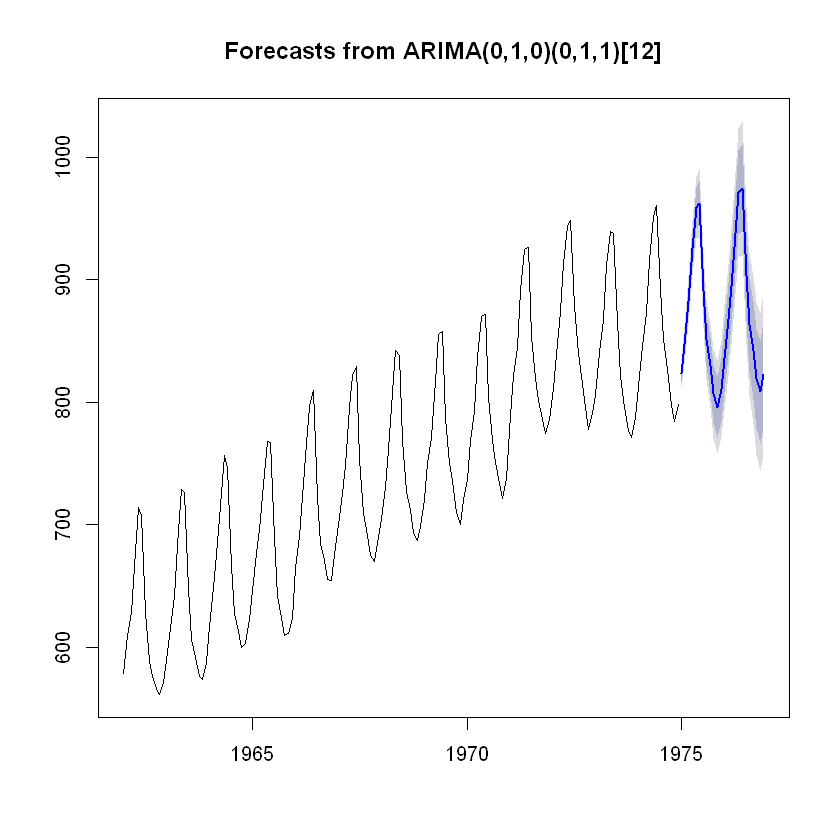

In [41]:
library('forecast')
forecast_m2 <- forecast(m2)

plot(forecast_m2)